<a href="https://www.kaggle.com/code/akshaypharande/bank-marketing-classification?scriptVersionId=118002789" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the data
data=pd.read_csv('../input/bank-marketing-dataset/bank.csv')

In [3]:
data.shape

(11162, 17)

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
data['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [7]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<AxesSubplot:xlabel='default', ylabel='balance'>

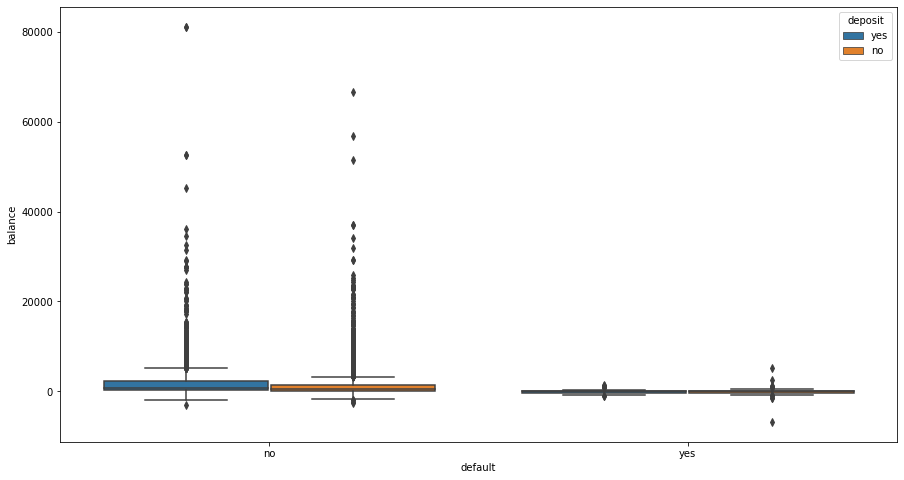

In [9]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.boxplot(x='default',y='balance',hue='deposit',data=data)

<AxesSubplot:xlabel='job', ylabel='balance'>

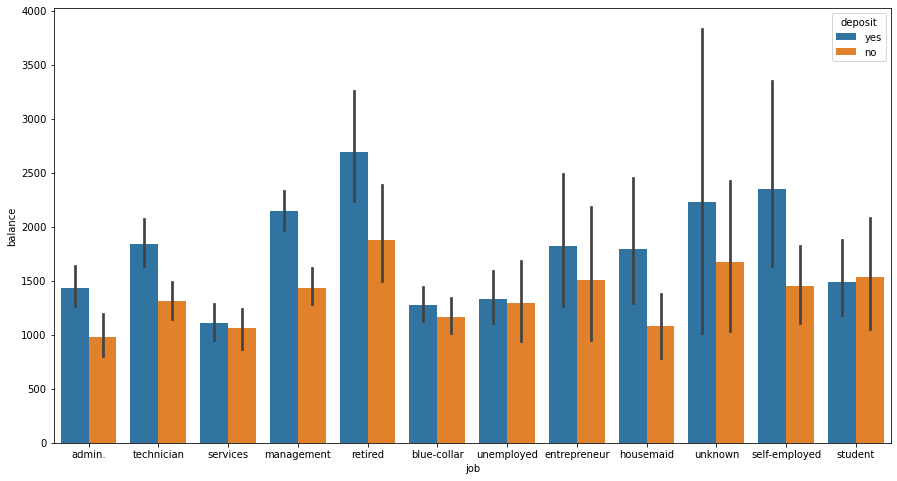

In [10]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.barplot(x='job',y='balance',hue='deposit',data=data)

(<AxesSubplot:xlabel='education', ylabel='(% balance)'>,
 Text(0, 0.5, '(% balance)'))

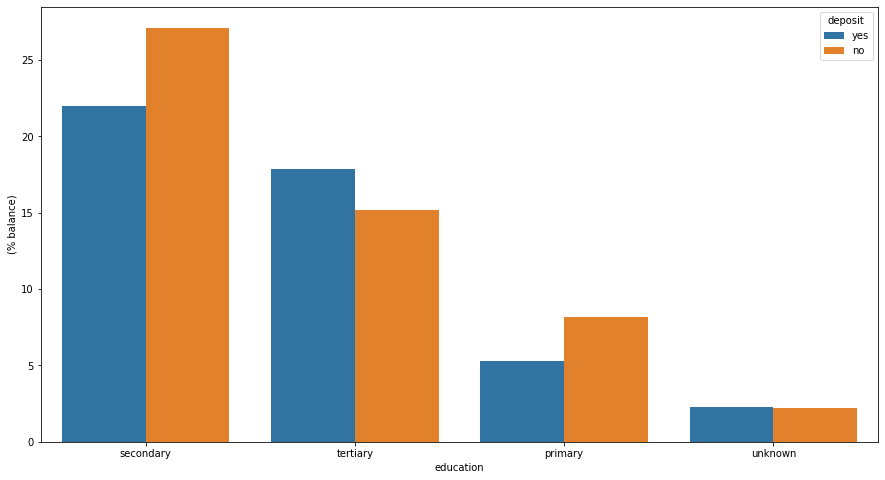

In [11]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.barplot(x='education',y='balance',hue='deposit',data=data,estimator=lambda x: len(x) / len(data)*100),plt.ylabel('(% balance)')


<AxesSubplot:xlabel='loan', ylabel='balance'>

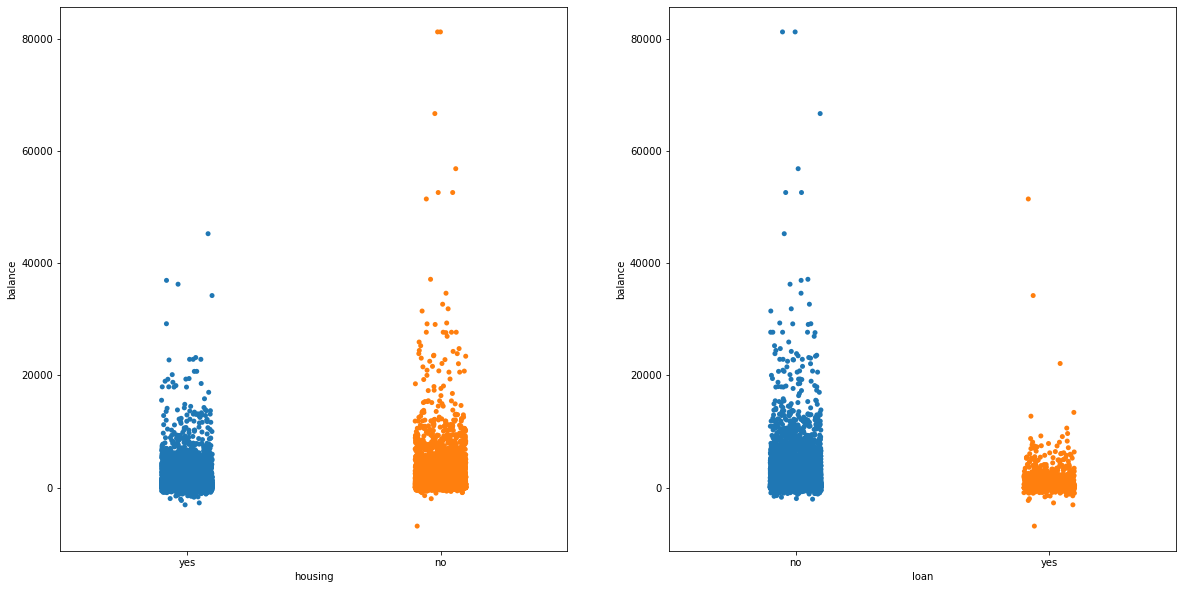

In [12]:
plt.rcParams['figure.figsize']=(20,10)
plt.subplot(121)
sns.stripplot(x='housing',y='balance',data=data)
plt.subplot(122)
sns.stripplot(x='loan',y='balance',data=data)

<AxesSubplot:ylabel='deposit'>

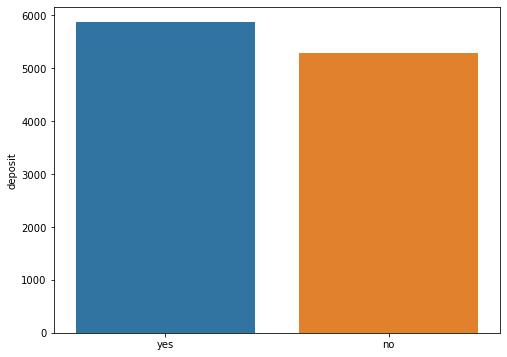

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['deposit'].unique(),y=data['deposit'].value_counts(),data=data,)

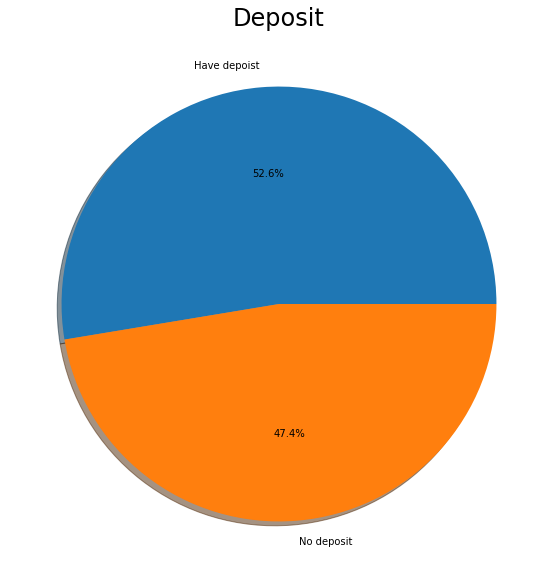

In [14]:
labels = ['Have depoist','No deposit']
deposit = plt.pie(data['deposit'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Deposit',fontsize=24)
plt.show()

In [15]:
data['deposit'] = data['deposit'].map({'yes':  1, 'no': 0})
data['housing'] = data['housing'].map({'yes':  1, 'no': 0})
data['loan'] = data['loan'].map({'yes':  1, 'no': 0})
data['contact'] = data['contact'].map({'cellular':  1, 'unknown': 0,'telephone' : 1})
data['month'] = data['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec':12})

In [16]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,1,0,0,5,5,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,0,0,0,5,5,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,1,0,0,5,5,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,1,0,0,5,5,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,0,0,0,5,5,673,2,-1,0,unknown,1


In [17]:
data['default'] = data['default'].map({'yes':  1, 'no': 0})

In [18]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,0,5,5,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,0,5,5,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,0,5,5,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,0,5,5,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,0,5,5,673,2,-1,0,unknown,1


In [19]:
data = pd.get_dummies(data, columns=['marital','poutcome','education'])
data.head().T

,0,1,2,3,4
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
default,0,0,0,0,0
balance,2343,45,1270,2476,184
housing,1,0,1,1,0
loan,0,0,0,0,0
contact,0,0,0,0,0
day,5,5,5,5,5
month,5,5,5,5,5
duration,1042,1467,1389,579,673


In [20]:
from sklearn.model_selection import train_test_split

X = data.drop('deposit', axis=1).drop('job',axis = 1)
y = data['deposit']

In [21]:
X.shape, y.shape

((11162, 23), (11162,))

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=0.3, random_state=12)

In [23]:
print(X_train.shape, y_train.shape)

(7813, 23) (7813,)


In [24]:
# distribution in training set
y_train.value_counts(normalize=True)

0    0.526174
1    0.473826
Name: deposit, dtype: float64

In [25]:
# distribution in validation set
y_valid.value_counts(normalize=True)

0    0.526127
1    0.473873
Name: deposit, dtype: float64

In [26]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [27]:
#fitting the model
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [28]:
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [29]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.7909823828008361

In [30]:
#predictions on validation set
dt_predict=dt_model.predict(X_valid)
dt_predict

array([0, 0, 0, ..., 1, 0, 0])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,dt_predict)

0.7909823828008361

In [32]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,15):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=6)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [33]:
frame = pd.DataFrame({'max_depth':range(1,15), 'train_acc':train_accuracy, 'Valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,Valid_acc
0,1,0.711634,0.710361
1,2,0.728529,0.727381
2,3,0.771407,0.770379
3,4,0.776910,0.763810
4,5,0.815564,0.798746


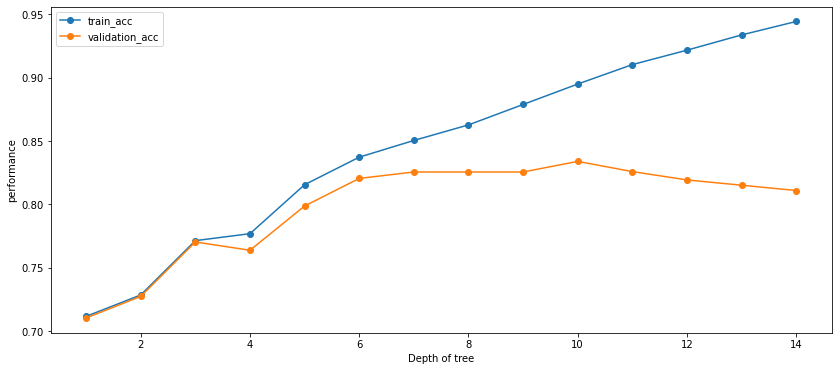

In [34]:
plt.figure(figsize=(14,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['Valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend(['train_acc','validation_acc'])

In [35]:
dt_model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=70, random_state=10)

In [36]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=70, random_state=10)

In [37]:
#Training score
dt_model.score(X_train, y_train)

0.8650966338154358

In [38]:
#Validation score
dt_model.score(X_valid, y_valid)

0.8456255598686175

In [39]:
dt_predict1=dt_model.predict(X_valid)
dt_predict1

array([0, 1, 0, ..., 1, 0, 0])

In [40]:
accuracy_score(y_valid,dt_predict1)

0.8456255598686175

In [41]:
from sklearn import tree

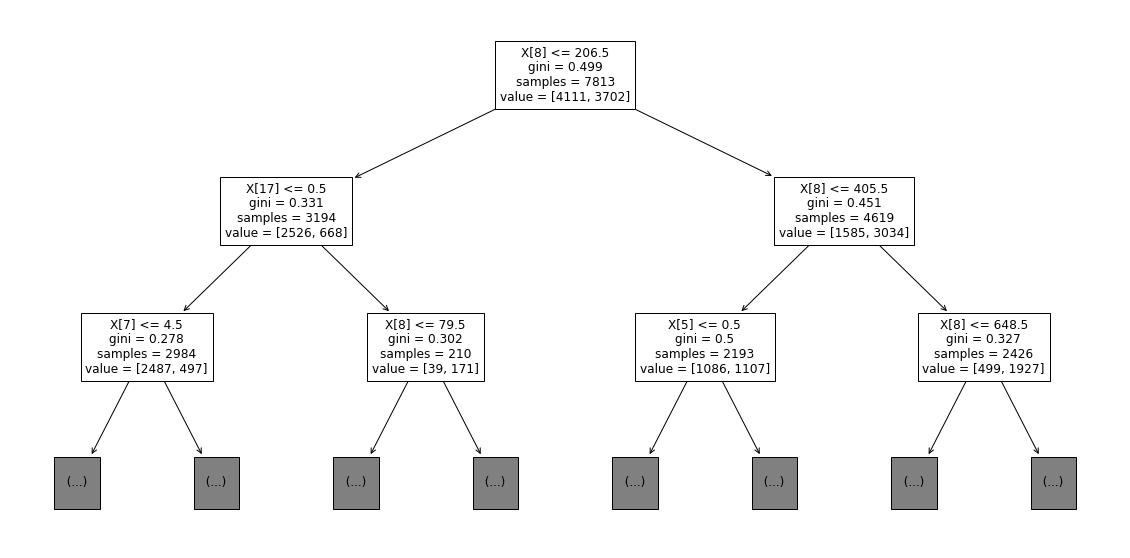

In [42]:
plt.figure(figsize = (20,10))
tree.plot_tree(dt_model,max_depth=2);

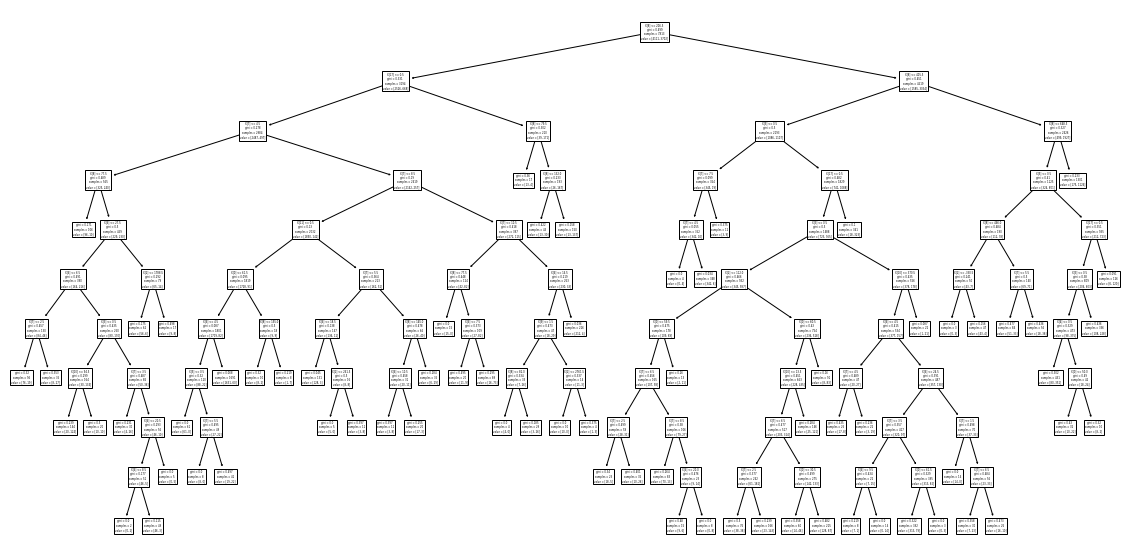

In [43]:
plt.figure(figsize = (20,10))
tree.plot_tree(dt_model);

In [44]:
# Get the confusion Matrix of the Model
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_valid,dt_predict1)
cnf_matrix

array([[1454,  308],
       [ 209, 1378]])

Text(0.5, 637.6, 'Predicted label')

<Figure size 288x288 with 0 Axes>

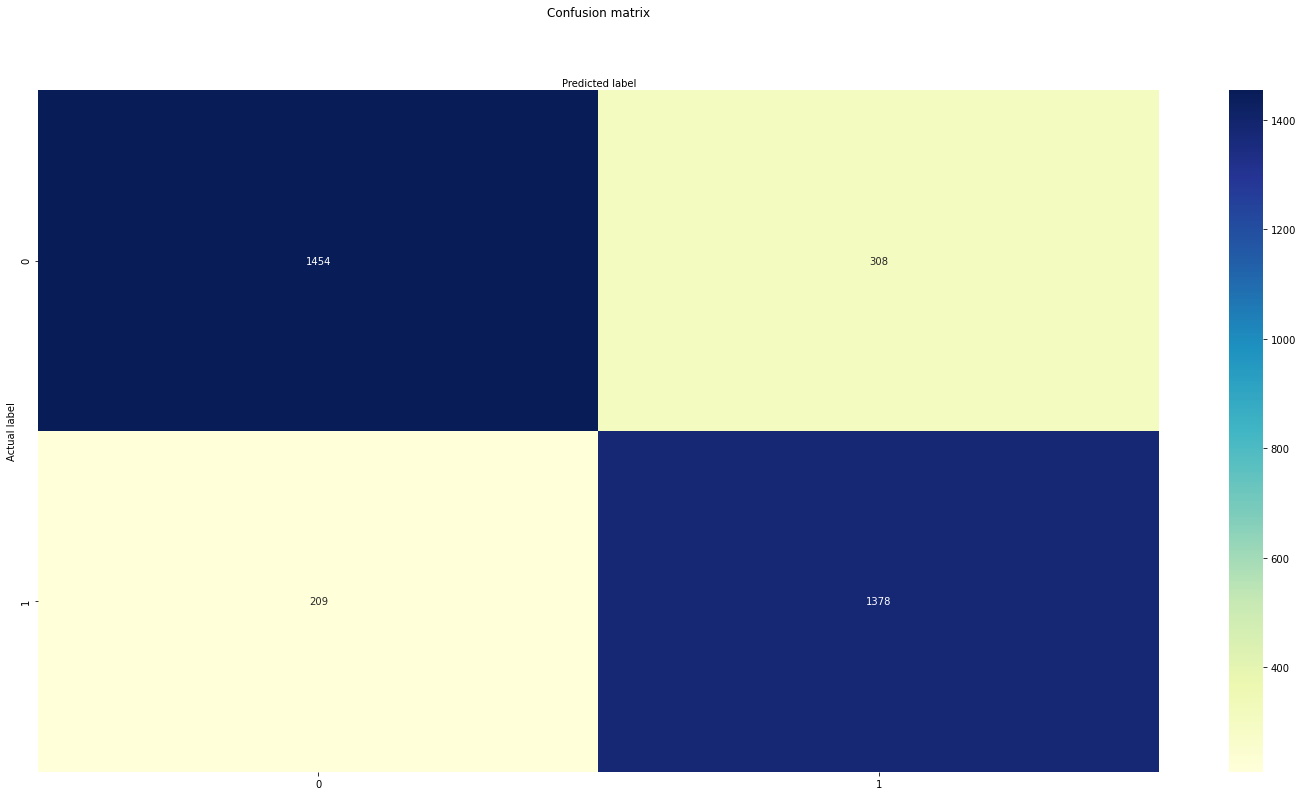

In [45]:
# Plot the Confusion Matrix as a HeatMap
plt.figure(figsize=(4,4))
class_names=[0,1] # Name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
print(metrics.classification_report(y, dt_model.predict(X),zero_division=1))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      5873
           1       0.83      0.88      0.86      5289

    accuracy                           0.86     11162
   macro avg       0.86      0.86      0.86     11162
weighted avg       0.86      0.86      0.86     11162



# Logistic Regression 

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
cols = X_train.columns
cols

Index(['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous',
       'marital_divorced', 'marital_married', 'marital_single',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown'],
      dtype='object')

In [49]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=cols)
X_train_scaled.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary,education_unknown
0,0.386667,0.0,0.084372,0.0,0.0,1.0,0.400000,0.636364,0.017797,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.693333,0.0,0.120714,0.0,0.0,1.0,0.500000,0.181818,0.158370,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.160000,0.0,0.082952,0.0,0.0,1.0,0.866667,0.272727,0.022182,0.016129,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.106667,0.0,0.089425,0.0,0.0,1.0,0.733333,0.727273,0.190869,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.400000,0.0,0.106132,0.0,0.0,1.0,0.433333,0.636364,0.024246,0.016129,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [50]:
X_valid_scaled = scaler.transform(X_valid)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=cols)
X_valid_scaled.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary,education_unknown
0,0.560000,0.0,0.089505,1.0,0.0,1.0,0.200000,0.636364,0.058550,0.032258,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.346667,0.0,0.090141,0.0,0.0,1.0,0.600000,0.545455,0.051586,0.048387,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.280000,0.0,0.080158,0.0,0.0,1.0,0.166667,0.090909,0.012639,0.016129,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.120000,0.0,0.079431,0.0,0.0,1.0,0.700000,0.454545,0.027599,0.064516,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.306667,0.0,0.080385,0.0,0.0,1.0,0.200000,0.636364,0.089760,0.016129,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [51]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [52]:
logreg = LogReg()

# Fitting the model
logreg.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [53]:
# Predicting over the Train
train_predict = logreg.predict(X_train)
train_predict

array([0, 1, 0, ..., 1, 0, 0])

In [54]:
# Calculating f1-score
k = f1_score(train_predict, y_train)
print('Training f1_score', k )

Training f1_score 0.7505733171455551


In [55]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(X_valid)
k = f1_score(test_predict, y_valid)
print('Test f1_score    ', k )

Test f1_score     0.7624763108022742


In [56]:
accuracy_score(y_valid,test_predict)

0.7754553598088981

In [57]:
cnf = metrics.confusion_matrix(y_valid,test_predict)
cnf

array([[1390,  372],
       [ 380, 1207]])

Text(0.5, 637.6, 'Predicted label')

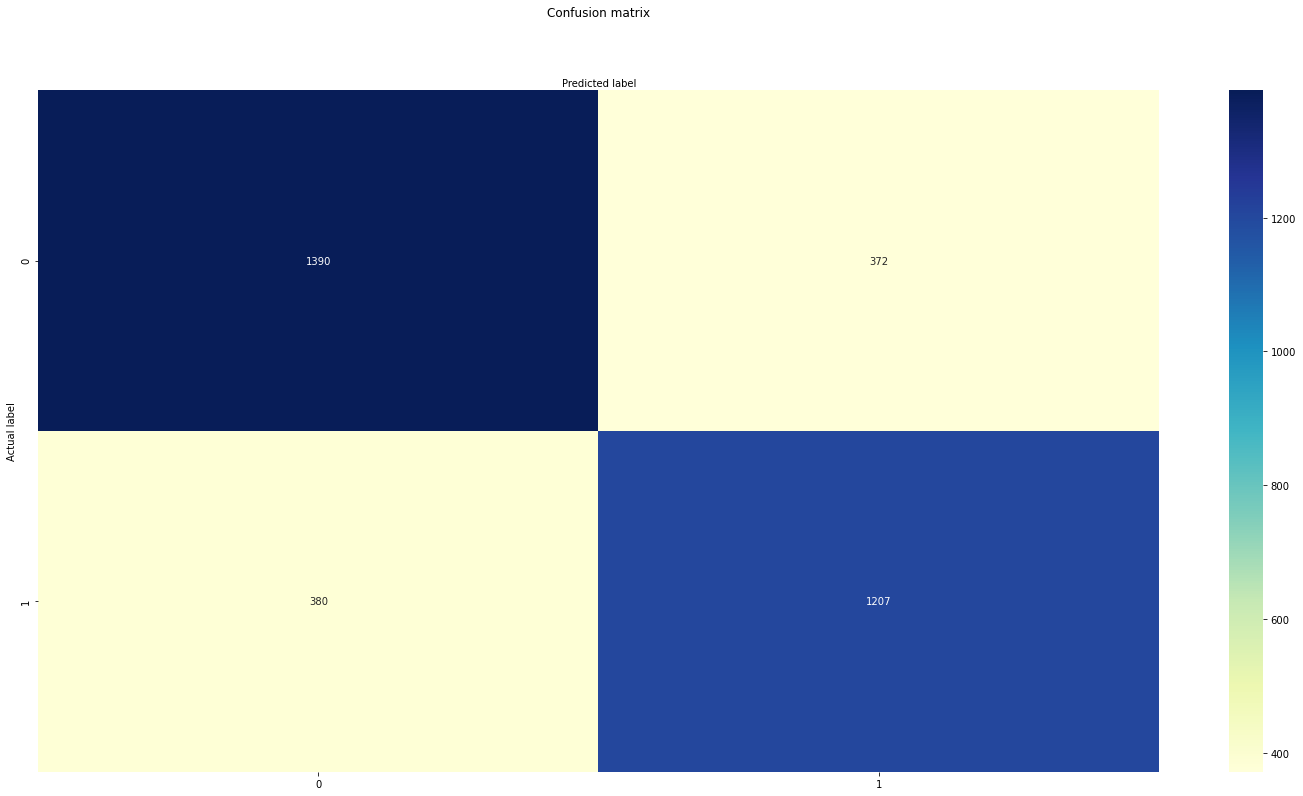

In [58]:
class_names=[0,1] # Name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
from sklearn.metrics import classification_report as rep
print(rep( y , logreg.predict(X),zero_division=1))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5873
           1       0.75      0.75      0.75      5289

    accuracy                           0.77     11162
   macro avg       0.77      0.77      0.77     11162
weighted avg       0.77      0.77      0.77     11162



In [60]:
# printing the coefficients
logreg.coef_

array([[-5.32316071e-03, -7.67239340e-03,  1.43581754e-05,
        -2.87567238e-01, -7.47940621e-02,  1.36179727e-01,
        -1.75862573e-02, -1.63544298e-02,  4.48822535e-03,
        -3.28994136e-01, -3.33186905e-04,  2.10185246e-01,
        -8.77095268e-04, -8.19431282e-02,  1.21605540e-02,
        -4.38921471e-02, -6.06707562e-03,  1.43605835e-01,
        -1.64306282e-01, -4.56366292e-02, -8.90435771e-02,
         5.43461670e-02,  9.67436981e-03]])

Text(0.5, 1.0, 'Coefficient plot')

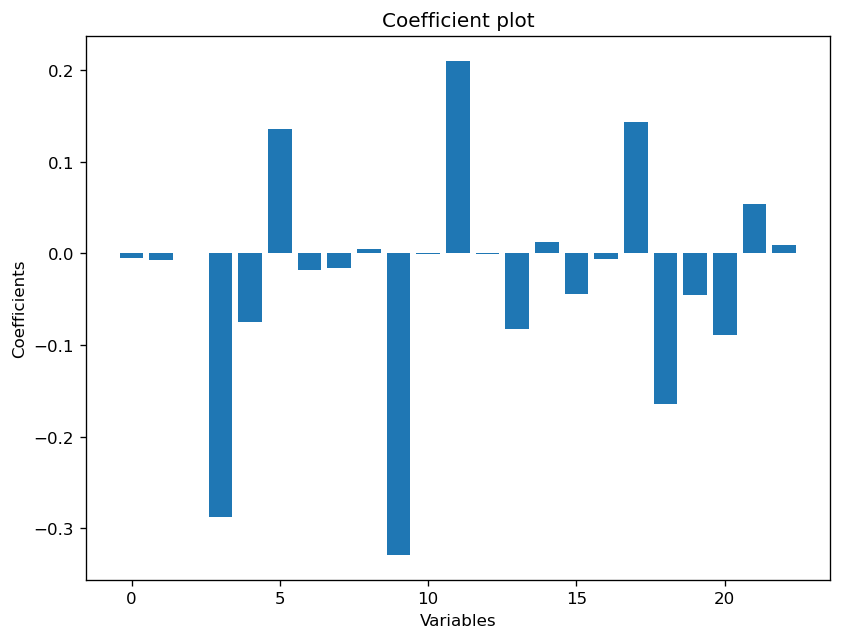

In [61]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [62]:
Coefficients = pd.DataFrame({
    'Variable'    : X_train.columns,
    'coefficient' : abs(c)
})
Coefficients.head()

,Variable,coefficient
0,age,0.005323
1,default,0.007672
2,balance,0.000014
3,housing,0.287567
4,loan,0.074794


In [63]:
#selecting variables with high coefficient
sig_var = Coefficients[Coefficients.coefficient > 0.01]

In [64]:
subset = data[sig_var['Variable'].values]
subset.head()

,housing,loan,contact,day,month,campaign,previous,marital_married,marital_single,poutcome_failure,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary
0,1,0,0,5,5,1,0,1,0,0,0,1,0,1,0
1,0,0,0,5,5,1,0,1,0,0,0,1,0,1,0
2,1,0,0,5,5,1,0,1,0,0,0,1,0,1,0
3,1,0,0,5,5,1,0,1,0,0,0,1,0,1,0
4,0,0,0,5,5,2,0,1,0,0,0,1,0,0,1


In [65]:
# Using train test split function
train_x,test_x,train_y,test_y = train_test_split(subset, y, random_state = 56)

In [66]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [67]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.6508626366390097


In [68]:
# Predicting over the Test Set and f1-score
test_predict_1 = logreg.predict(test_x)
k = f1_score(test_predict_1, test_y)
print('Test f1_score    ', k )

Test f1_score     0.6363995262534544


In [69]:
cnf = metrics.confusion_matrix(test_y,test_predict_1)
cnf

array([[1064,  400],
       [ 521,  806]])

Text(0.5, 1.0, 'Coefficient plot')

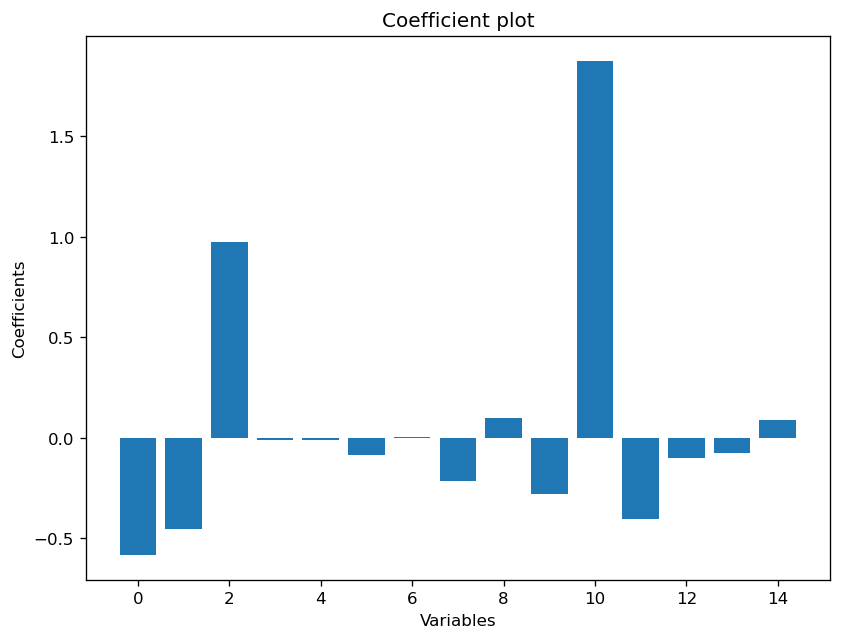

In [70]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

# **SVM**